# <center>SleepWise: Harnessing ML to Predict Sleep Disorders </center>

![good sleep](./../media/goodsleep.jpg)

<img src="./../media/benefits1.png" width="600" height="400">

<img src="./../media/diff.jpg" width="510" height="360">

# Problem statement - Predicting wheather a person has sleep disorder or not according to health indicators.

# Analytic approach - Multi-Class Classification {Sleep Apnea, Insomnia, No disorder} 

## Dataset Overview

The Sleep Health and Lifestyle Dataset comprises 748 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset

1. **Comprehensive Sleep Metrics:** Explore sleep duration, quality, and factors influencing sleep patterns.

<p></p>

2. **Lifestyle Factors:** Analyze physical activity levels, stress levels, and BMI categories.

<p></p>

3. **Cardiovascular Health:** Examine blood pressure and heart rate measurements.

<p></p>

4. **Sleep Disorder Analysis:** Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Dataset Columns

1. **Person ID:** An identifier for each individual.

<p></p>

2. **Gender:** The gender of the person (Male/Female).

<p></p>

3. **Age:** The age of the person in years.

<p></p>

4. **Occupation:** The occupation or profession of the person.

<p></p>

5. **Sleep Duration (hours):** The number of hours the person sleep per day.

<p></p>

6. **Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.

      - **Sleep Satisfaction**: Individuals can rate how satisfied they are with their sleep on a scale from 1 (very dissatisfied) to 10 (very satisfied).
      - **Sleep Disturbances**: Individuals can rate the number and intensity of sleep disturbances they experienced, with 1 being frequent and severe disturbances and 10 being none at all.
      - **Refreshment**: Participants can rate how refreshed they feel after waking up, with 1 being completely unrefreshed and 10 being fully refreshed.
        
<p></p>

7. **Physical Activity Level (minutes/day):** The number of minutes the person engages in physical activity daily.

<p></p>

8. **Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

      - **Perceived Stress**: Individuals can assess their perceived stress levels over a defined period (e.g., the last week) on a scale from 1 (not stressed at all) to 10 (extremely stressed).
           
<p></p>

9. **BMI Category:** The BMI category of the person (e.g.Normal, Overweight,Obese).

<p></p>

10. **Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

<p></p>

11. **Heart Rate (bpm):** The resting heart rate of the person in beats per minute.

<p></p>

12. **Daily Steps:** The number of steps the person takes per day.

<p></p>

13. **Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

### Details about Sleep Disorder Column

- **None:** The individual does not exhibit Insomnia, Sleep Apnea disorder.

<p></p>

- **Insomnia:** The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

<p></p>

- **Sleep Apnea:** The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


# Importing necessary packages

In [60]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Loading dataset

In [61]:
sleep_df = pd.read_csv('./../datasets/Sleep_health_and_lifestyle_dataset.csv')

# Data Understanding 

In [62]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27.0,Software Engineer,6.1,6.0,42,6,Overweight,126/83,77,4200.0,None
1,2,NaN,28.0,Doctor,6.2,6.0,60,8,Normal,125/80,75,10000.0,None
2,3,Male,28.0,Doctor,6.2,6.0,60,8,Normal,125/80,75,10000.0,None
3,4,Male,28.0,Sales Representative,5.9,4.0,30,8,Obese,140/90,85,3000.0,Sleep Apnea
4,5,Male,28.0,Sales Representative,5.9,4.0,30,8,Obese,140/90,85,3000.0,Sleep Apnea


In [63]:
sleep_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [64]:
sleep_df.shape

(748, 13)

### Descriptive analysis

In [65]:
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,748.00000,744.000000,746.000000,743.000000,748.000000,748.000000,748.000000,745.000000
mean,374.50000,42.237903,7.130295,7.320323,59.183155,5.386364,70.176471,6815.436242
std,216.07329,8.658225,0.795436,1.195095,20.795875,1.774179,4.142816,1618.206429
min,1.00000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,187.75000,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,374.50000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,561.25000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,748.00000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [66]:
sleep_df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,742,745,743,748,745
unique,2,11,4,26,3
top,Male,Nurse,Normal,130/85,None
freq,372,146,385,199,436


### Datatypes of columns

In [67]:
sleep_df.dtypes

Person ID                    int64
Gender                      object
Age                        float64
Occupation                  object
Sleep Duration             float64
Quality of Sleep           float64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                float64
Sleep Disorder              object
dtype: object

# Data Cleaning

### Checking missing values

In [68]:
sleep_df.isnull().sum()

Person ID                  0
Gender                     6
Age                        4
Occupation                 3
Sleep Duration             2
Quality of Sleep           5
Physical Activity Level    0
Stress Level               0
BMI Category               5
Blood Pressure             0
Heart Rate                 0
Daily Steps                3
Sleep Disorder             3
dtype: int64

### Dropping irrelevant column - Person ID

In [69]:
sleep_df.drop(['Person ID'],axis=1,inplace=True)

### Replacing Normal Weight as Normal value 

In [70]:
sleep_df[(sleep_df['BMI Category']=='Normal Weight') | (sleep_df['BMI Category']=='Normal') ].sample(15)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
72,Male,33.0,Doctor,6.1,6.0,30,8,Normal,125/80,72,5000.0,None
398,Male,30.0,Doctor,7.8,7.0,75,6,Normal,120/80,70,8000.0,None
410,Male,31.0,Doctor,6.1,6.0,30,8,Normal,125/80,72,5000.0,None
122,Female,37.0,Accountant,7.2,8.0,60,4,Normal,115/75,68,7000.0,None
464,Male,35.0,Engineer,7.3,8.0,60,4,Normal,125/80,65,5000.0,None
481,Male,37.0,Engineer,7.8,8.0,70,4,Normal Weight,120/80,68,7000.0,None
432,Male,32.0,Doctor,6.0,6.0,30,8,Normal,125/80,72,5000.0,None
79,Male,33.0,Doctor,6.0,6.0,30,8,Normal,125/80,72,5000.0,None
162,Female,40.0,Accountant,7.2,8.0,55,6,Normal Weight,119/77,73,7300.0,None
99,Female,NaN,Teacher,7.1,8.0,60,4,Normal,117/76,68,7000.0,None


In [71]:
sleep_df['BMI Category'] = sleep_df['BMI Category'].replace('Normal Weight', 'Normal')

### Splitting Blood Pressure column into Systolic Pressure and Diastolic Pressure and converting it as numerical

In [72]:
sleep_df[['systolicPressure', 'diastolicPressure']] = sleep_df['Blood Pressure'].str.split('/', expand=True).astype(int)
sleep_df.drop('Blood Pressure', axis=1, inplace=True)

### Handling missing values in categorical columns - Filling missing values with mode of column

In [73]:
categorical_features = sleep_df.select_dtypes(include='object').columns
for cols in categorical_features:
    mode = sleep_df[cols].mode()[0]
    print(cols, ' - ',mode,'\n')
    sleep_df[cols]= sleep_df[cols].fillna(mode)

Gender  -  Male 

Occupation  -  Nurse 

BMI Category  -  Normal 

Sleep Disorder  -  None 



### Handling missing values in numerical columns - Filling missing values with median of column

In [74]:
numerical_features = sleep_df.select_dtypes(exclude='object').columns
for cols in numerical_features:
    median = sleep_df[cols].median()
    print(cols, ' - ',median,'\n')
    sleep_df[cols]= sleep_df[cols].fillna(median)

Age  -  43.0 

Sleep Duration  -  7.2 

Quality of Sleep  -  7.0 

Physical Activity Level  -  60.0 

Stress Level  -  5.0 

Heart Rate  -  70.0 

Daily Steps  -  7000.0 

systolicPressure  -  130.0 

diastolicPressure  -  85.0 



### Displaying unique values of each column - To find out any hidden missing values or anomaly presence

In [75]:
for i in sleep_df.columns:
    print(i, ' - ', sleep_df[i].unique())

Gender  -  ['Male' 'Female']
Age  -  [27. 28. 29. 30. 43. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 44.
 45. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
Occupation  -  ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Sleep Duration  -  [6.1 6.2 5.9 6.3 7.8 7.2 6.  6.5 7.6 7.7 7.9 6.4 7.5 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep  -  [6. 4. 7. 5. 8. 9.]
Physical Activity Level  -  [42 60 30 40 75 35 45 47 50 32 52 70 80 55 90 65 85]
Stress Level  -  [6 8 7 4 3 5]
BMI Category  -  ['Overweight' 'Normal' 'Obese']
Heart Rate  -  [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]
Daily Steps  -  [ 4200. 10000.  3000.  3500.  8000.  4000.  7000.  4100.  6800.  5000.
  5500.  5200.  5600.  3300.  4800.  7500.  7300.  6200.  6000.  3700.]
Sleep Disorder  -  ['None' 'Sleep Apnea' 'Insomnia']
systolicPressure  -  [126 125 140 120 132 130 117 170 118 128

### Checking outliers through boxplot

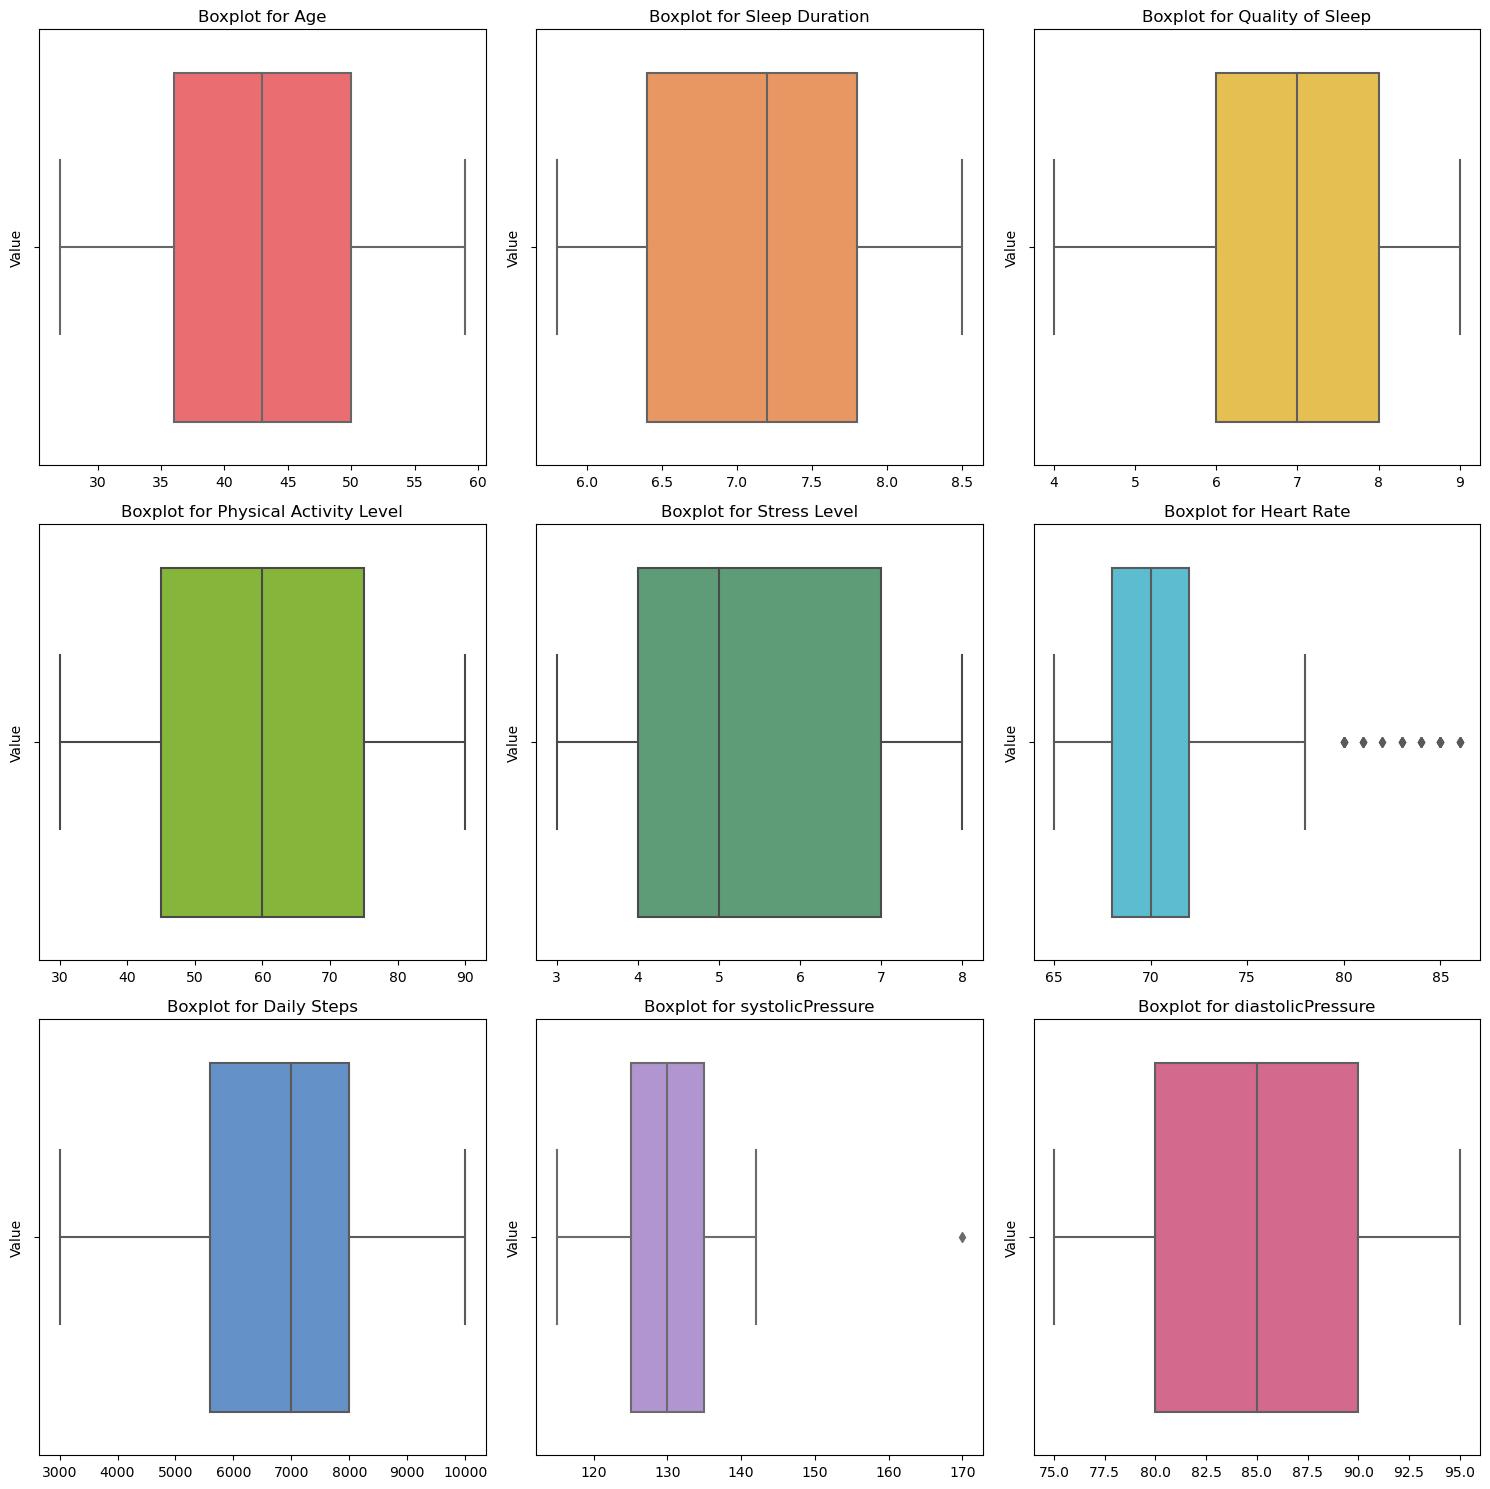

In [76]:
custom_colors = ["#ff595e","#ff924c","#ffca3a","#8ac926","#52a675","#48cae4","#5390d9","#b18bda","#e55786"]

color_palette = sns.color_palette(custom_colors)
num_rows = 3
num_cols = 3
num_plots = num_rows * num_cols
plt.figure(figsize=(15, 15))

for i, feature in enumerate(numerical_features):
    current_color = color_palette[i % len(color_palette)]
    
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=sleep_df, x=feature, color=current_color)
    plt.title(f"Boxplot for {feature}")
    plt.xlabel("")
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

#### Inference - Thus there are less outliers, we dont need to remove those because data is relatively clean

# Data Visualization

### Univariate Analysis

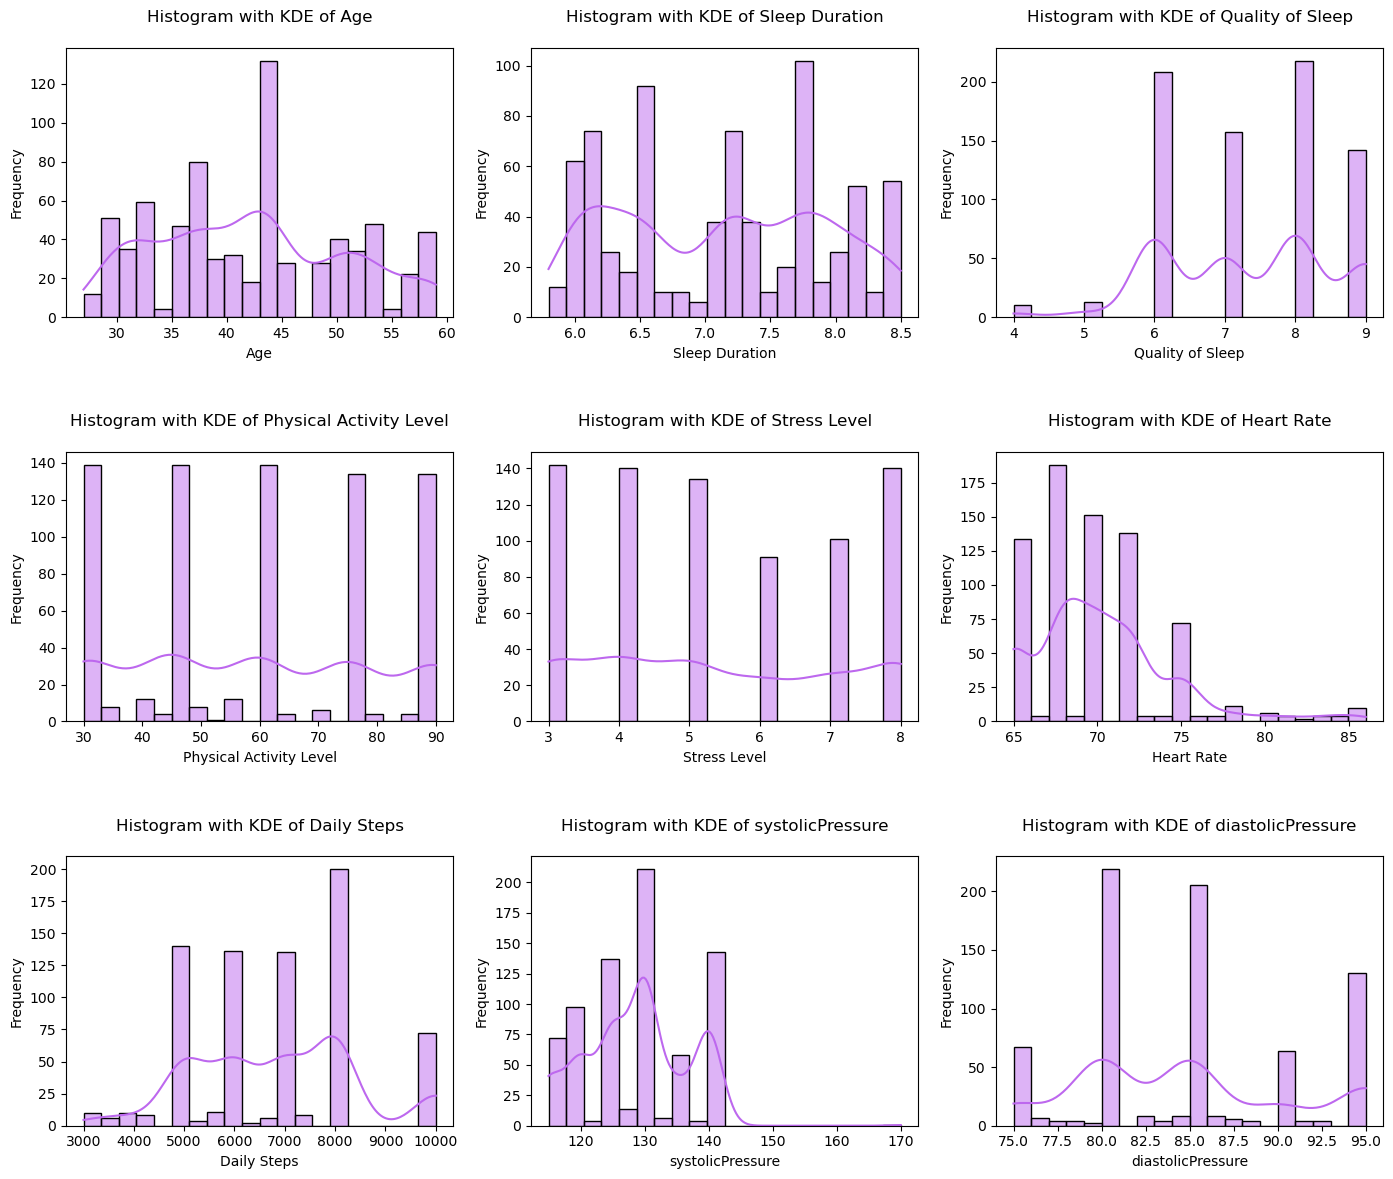

In [77]:
plt.figure(figsize=(17, 14))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(sleep_df[feature], kde=True, bins=20, color='#bd68ee', edgecolor='black')
    plt.title(f"Histogram with KDE of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [78]:
sleep_df.skew()

Age                        0.248943
Sleep Duration             0.042065
Quality of Sleep          -0.209694
Physical Activity Level    0.076202
Stress Level               0.152490
Heart Rate                 1.214919
Daily Steps                0.179449
systolicPressure           0.132345
diastolicPressure          0.366302
dtype: float64

#### Inference - All numerical columns are displayed. Their distribution of data can been visualized here - 

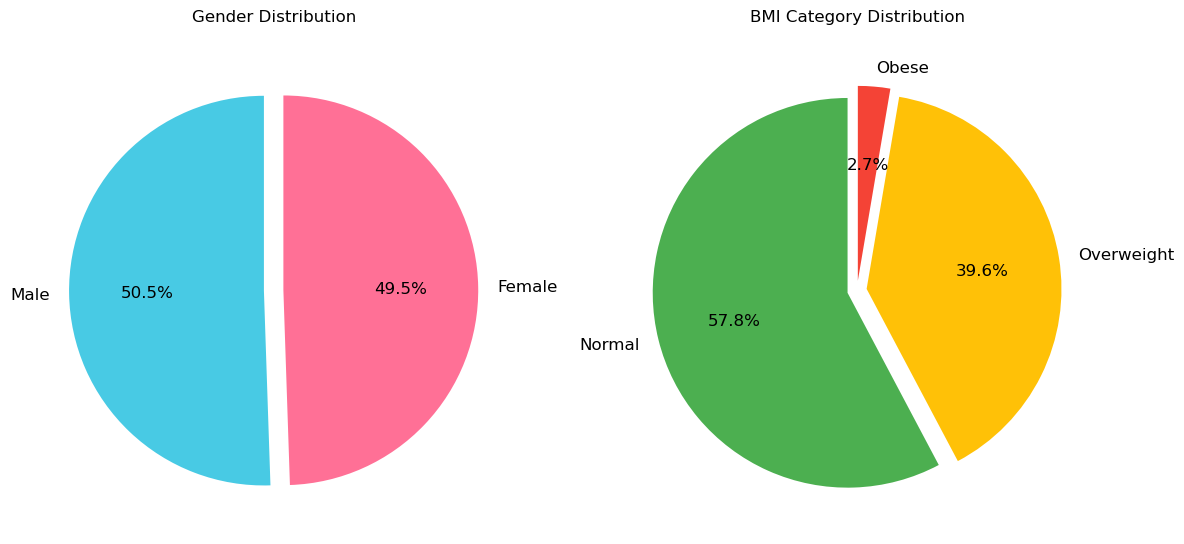

In [79]:
gender_values = sleep_df['Gender'].value_counts()
bmi_category_values = sleep_df['BMI Category'].value_counts()

gender_colors = ['#48cae4', '#ff7096']
bmi_colors = ['#4CAF50', '#FFC107', '#F44336']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

explode_gender = (0.05, 0.05)
explode_bmi = (0.05,) * len(bmi_category_values)

axes[0].pie(gender_values, labels=gender_values.index, autopct='%1.1f%%', startangle=90, explode=explode_gender, colors=gender_colors, textprops={'fontsize': 12})
axes[0].set_title('Gender Distribution\n')

axes[1].pie(bmi_category_values, labels=bmi_category_values.index, autopct='%1.1f%%', startangle=90, explode=explode_bmi, colors=bmi_colors, textprops={'fontsize': 12})
axes[1].set_title('BMI Category Distribution\n')

plt.tight_layout()
plt.show()

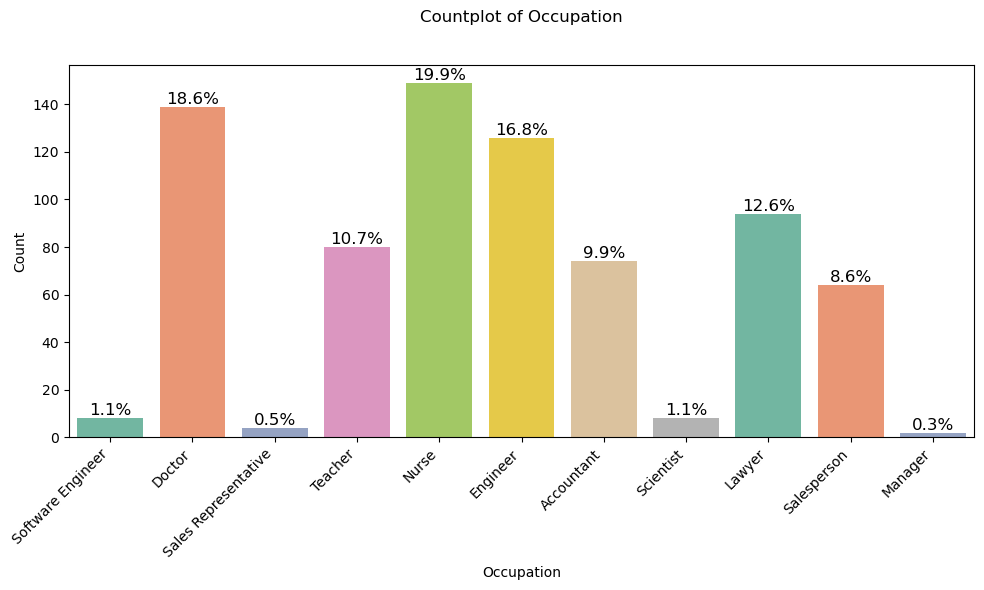

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=sleep_df, x='Occupation', palette="Set2")

total_count = len(sleep_df['Occupation'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.title('Countplot of Occupation\n\n')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

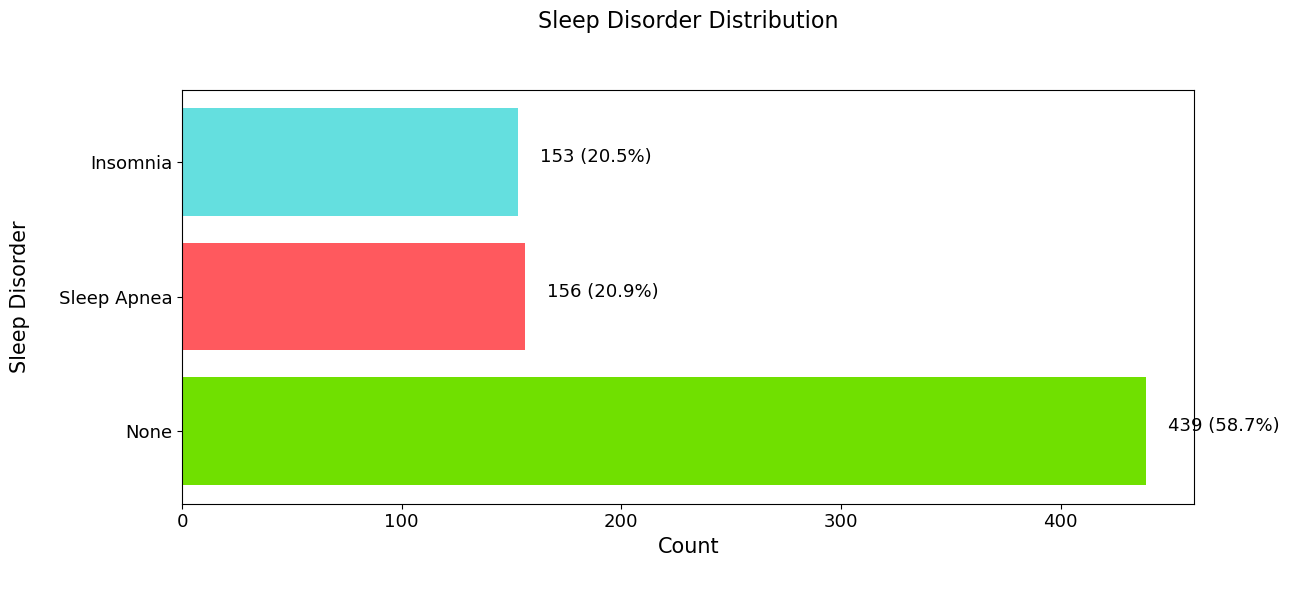

In [81]:
sleep_disorder_values = sleep_df['Sleep Disorder'].value_counts()
total_sleep_disorders = len(sleep_df)
sleep_disorder_percentages = (sleep_disorder_values / total_sleep_disorders) * 100

custom_colors = ['#70e000' ,'#ff595e','#64dfdf']

plt.figure(figsize=(13, 6))
plt.barh(sleep_disorder_values.index, sleep_disorder_values, color=custom_colors)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count\n', fontsize=15)
plt.ylabel('Sleep Disorder\n', fontsize=15)
plt.title('Sleep Disorder Distribution\n\n', fontsize=16)

for i, v in enumerate(sleep_disorder_values):
    plt.text(v + 10, i, f'{v} ({sleep_disorder_percentages.iloc[i]:.1f}%)', fontsize=13)

plt.tight_layout()
plt.show()

#### Inference - Target variable labels are imbalanced

### Bivariate Analysis

<Figure size 1500x600 with 0 Axes>

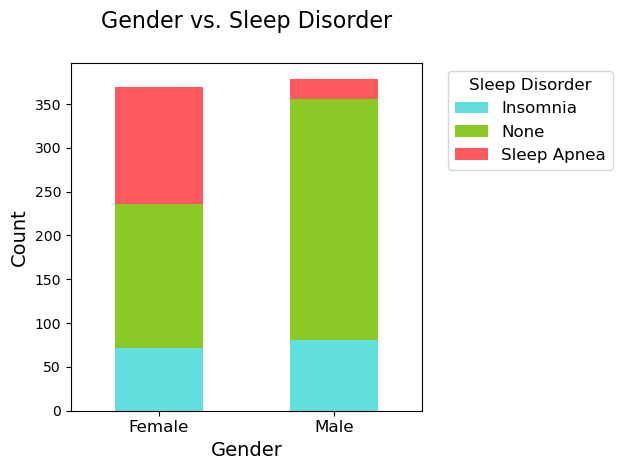

In [82]:
gender_sleep_disorder = pd.crosstab(sleep_df['Gender'], sleep_df['Sleep Disorder'])
plt.figure(figsize=(15, 6))
ax = gender_sleep_disorder.plot(kind='bar', stacked=True, color=['#64dfdf', '#8ac926', '#ff595e'])
plt.title('Gender vs. Sleep Disorder\n', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

plt.legend(title='Sleep Disorder', fontsize=12, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

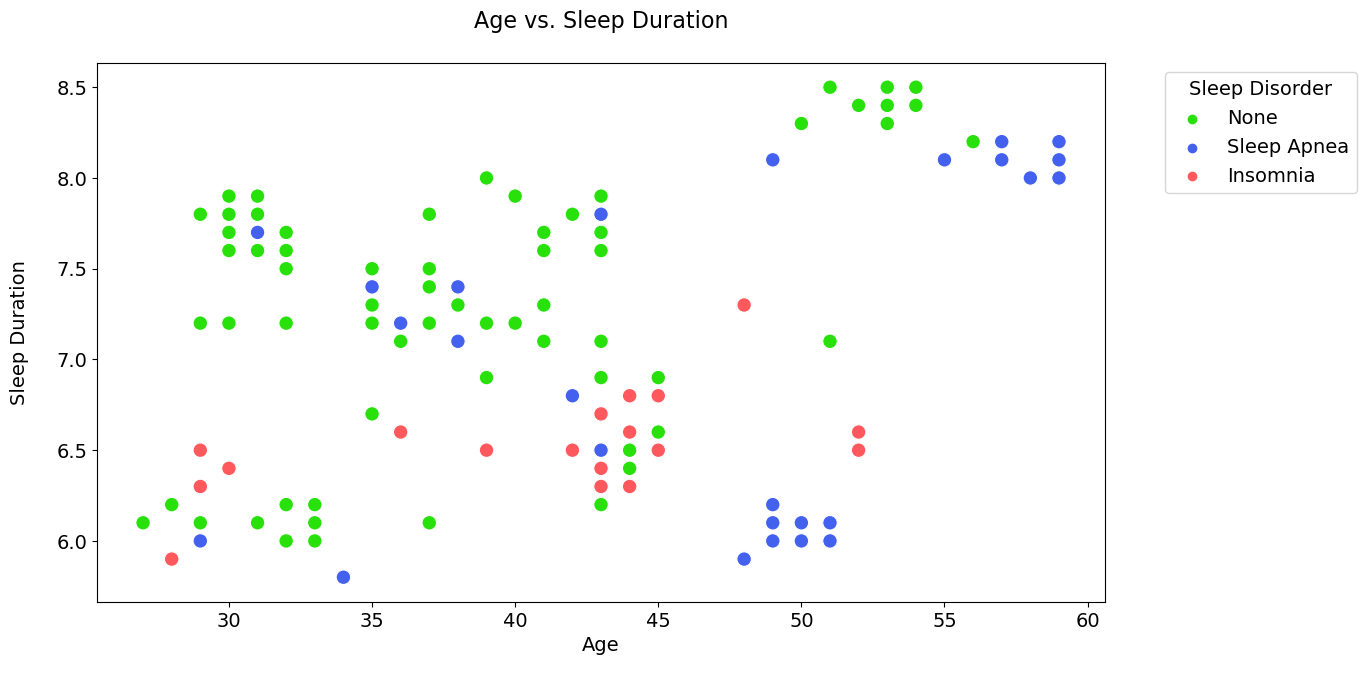

In [83]:
custom_colors = {'None': '#28e10a', 'Sleep Apnea': '#4361ee', 'Insomnia': '#ff595e'}

plt.figure(figsize=(13, 7))
sns.scatterplot(data=sleep_df, x='Age', y='Sleep Duration', hue='Sleep Disorder', palette=custom_colors,s=110)
plt.title('Age vs. Sleep Duration\n', fontsize=16)
plt.xlabel('Age\n', fontsize=14)
plt.ylabel('Sleep Duration\n', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.legend(title='Sleep Disorder', fontsize=14, title_fontsize=14,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

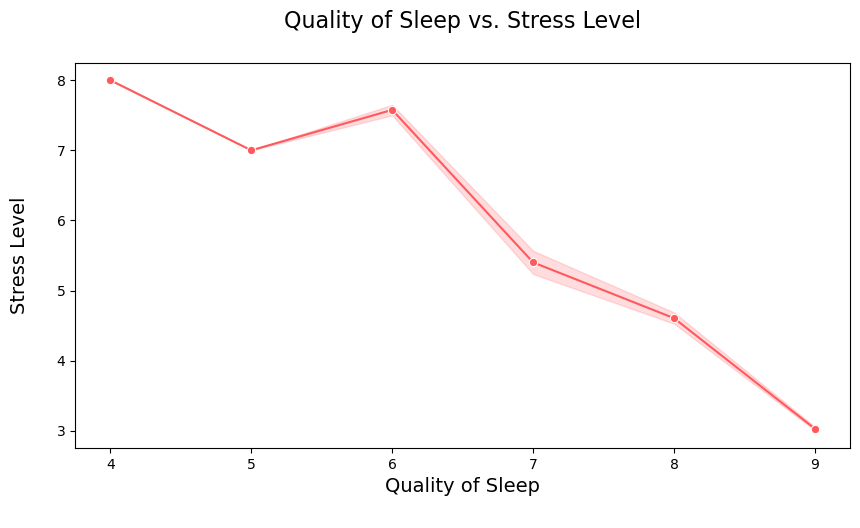

In [84]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sleep_df, x='Quality of Sleep', y='Stress Level', marker='o', color='#ff595e')
plt.xlabel('Quality of Sleep\n', fontsize=14)
plt.ylabel('Stress Level\n', fontsize=14)
plt.title('Quality of Sleep vs. Stress Level\n', fontsize=16)

plt.show()

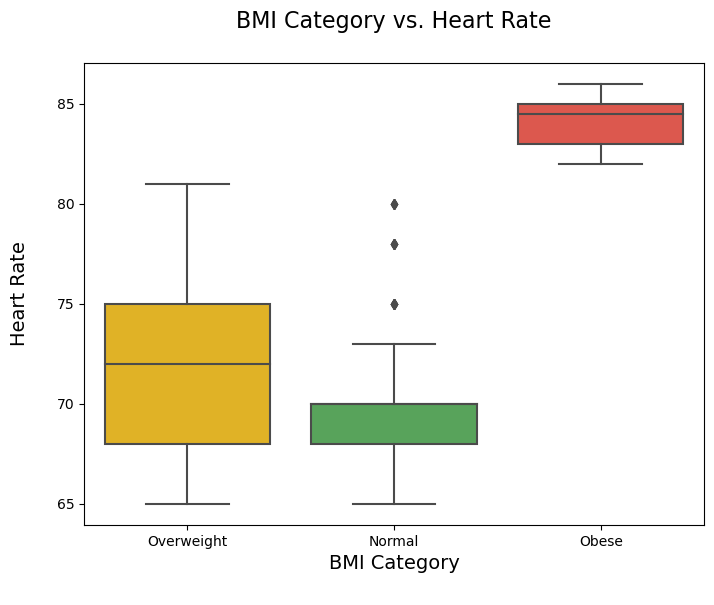

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sleep_df, x='BMI Category', y='Heart Rate', palette=[ '#FFC107','#4CAF50','#F44336'])
plt.title('BMI Category vs. Heart Rate\n', fontsize=16)
plt.xlabel('BMI Category\n', fontsize=14)
plt.ylabel('Heart Rate\n', fontsize=14)
plt.show()

### Multivariate Analysis

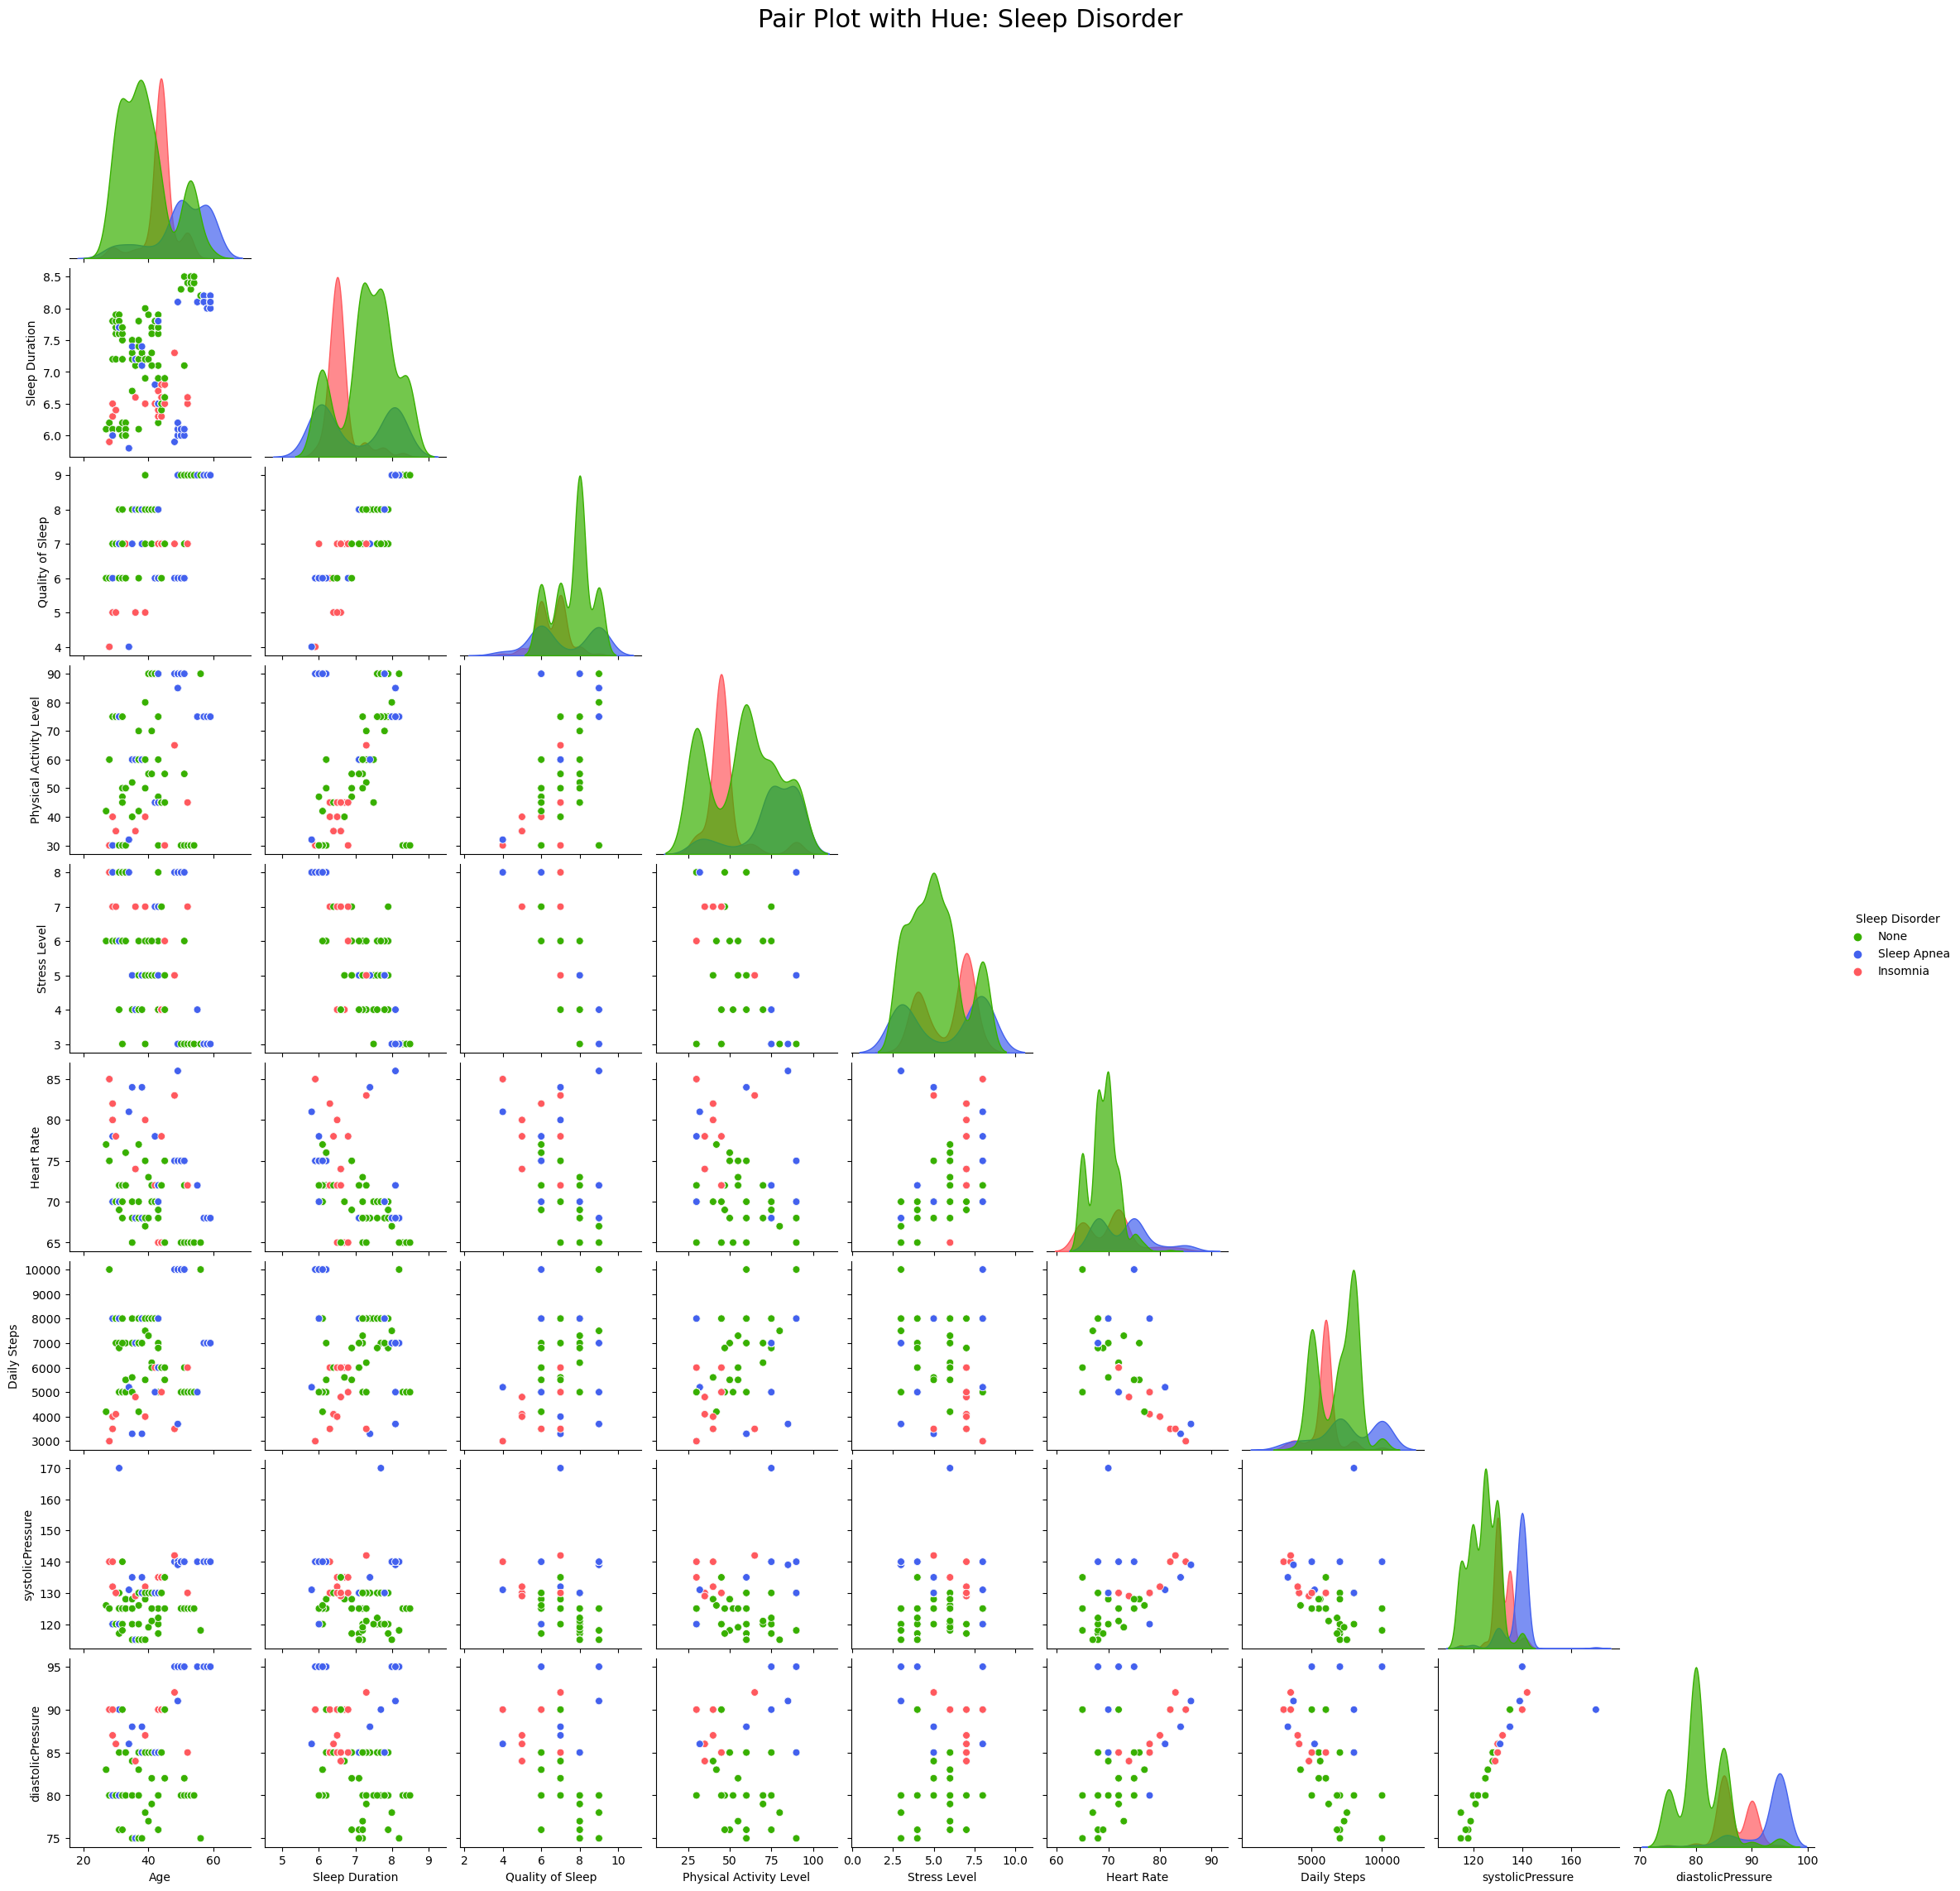

In [86]:
custom_colors = {'None': '#38b000', 'Sleep Apnea': '#4361ee', 'Insomnia': '#ff595e'}

sns.pairplot(data=sleep_df, hue='Sleep Disorder', palette=custom_colors,corner=True, diag_kind='kde', plot_kws={'s': 40}, diag_kws={'fill': True, 'color': 'k', 'alpha': 0.7})

plt.suptitle('Pair Plot with Hue: Sleep Disorder', fontsize=22,y=1.02)
plt.show()

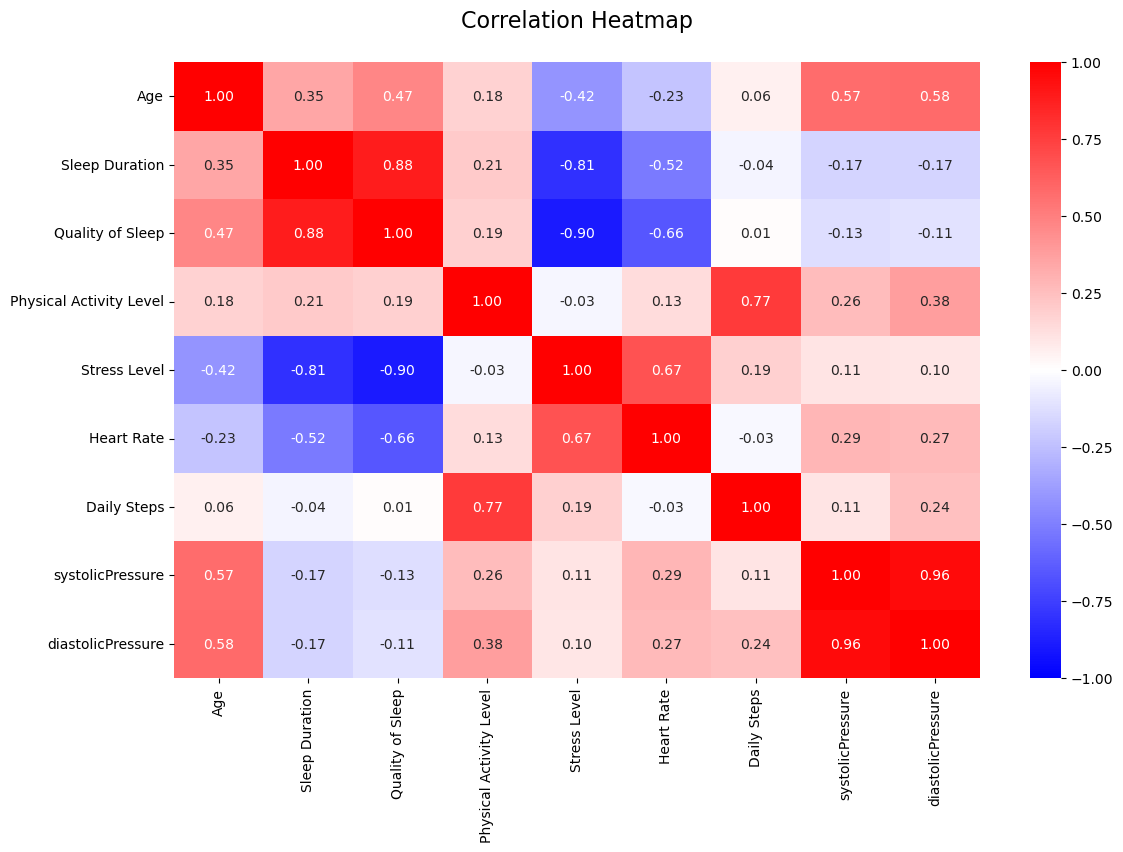

In [87]:
correlation_matrix = sleep_df.corr()
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt='.2f',vmin=-1.0,vmax=+1.0)
plt.title('Correlation Heatmap\n', fontsize=16)
plt.show()

# Standard Scaling

In [88]:
scaler = StandardScaler()
for column in sleep_df.select_dtypes(exclude='object'):
    sleep_df[column] = scaler.fit_transform(sleep_df[[column]])

# Label Encoding

In [89]:
encoder = LabelEncoder()
encoded_labels = {}

for column in sleep_df.select_dtypes(include='object'):
    sleep_df[column] = encoder.fit_transform(sleep_df[column])
    encoded_labels[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Now encoded_labels dictionary contains the mapping for each column
print(encoded_labels)


{'Gender': {'Female': 0, 'Male': 1}, 'Occupation': {'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}, 'BMI Category': {'Normal': 0, 'Obese': 1, 'Overweight': 2}, 'Sleep Disorder': {'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}}


# Balancing Target Variable using SMOTE method

In [90]:
sleep_df['Sleep Disorder'].value_counts()

1    439
2    156
0    153
Name: Sleep Disorder, dtype: int64

In [91]:
X = sleep_df.drop('Sleep Disorder',axis=1)
y = sleep_df['Sleep Disorder']

In [92]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
sleep_df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Sleep Disorder')], axis=1)
print(sleep_df_resampled['Sleep Disorder'].value_counts())

1    439
2    439
0    439
Name: Sleep Disorder, dtype: int64


In [93]:
sleep_df_resampled.shape

(1317, 13)

# Feature Importance

In [94]:
np.random.seed(1)

X = sleep_df_resampled.drop('Sleep Disorder', axis=1)
y = sleep_df_resampled['Sleep Disorder']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
total_importance = feature_importances_df['Importance'].sum()
feature_importances_df['Importance'] = (feature_importances_df['Importance'] / total_importance) * 100
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [95]:
feature_importances_df

,Feature,Importance
10,systolicPressure,18.241514
11,diastolicPressure,15.705481
7,BMI Category,14.215853
1,Age,11.861400
5,Physical Activity Level,8.036902
2,Occupation,7.663662
3,Sleep Duration,7.342842
9,Daily Steps,6.892895
8,Heart Rate,4.510302
4,Quality of Sleep,2.767398


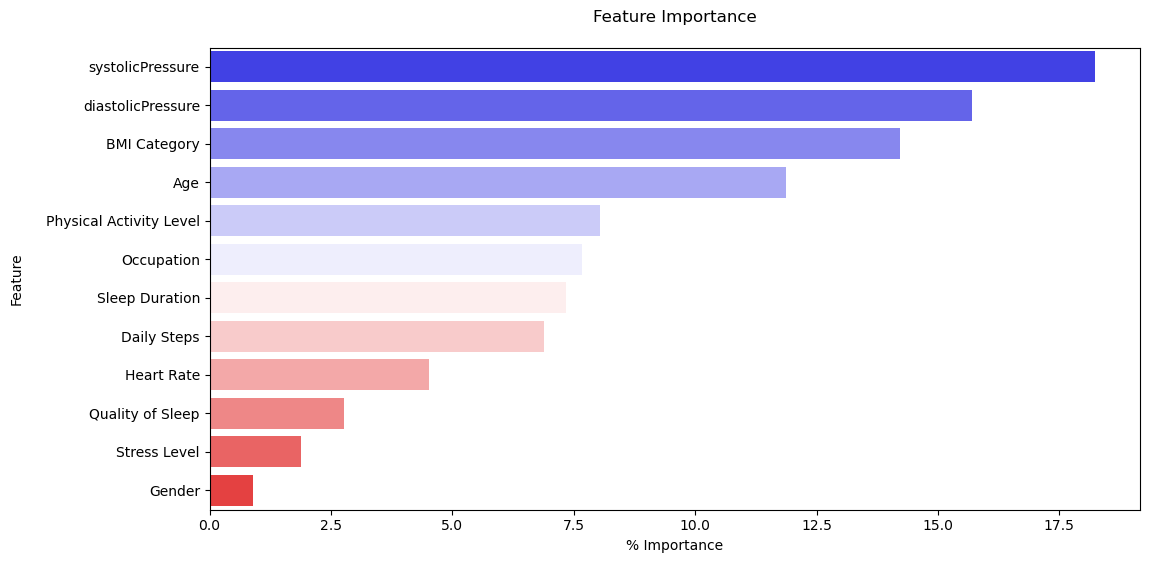

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='bwr')
plt.title('Feature Importance\n')
plt.xlabel('% Importance\n')
plt.ylabel('Feature\n')
plt.show()

# Model building

In [97]:
X = sleep_df_resampled.drop('Sleep Disorder',axis=1)
y = sleep_df_resampled['Sleep Disorder']

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [99]:
k_values = range(1, 31)

results = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy

best_k = max(results, key=results.get)
print(f"Best k value: {best_k}")

Best k value: 1


In [100]:
param_grid = {
    'max_depth': [None, 3, 5, 7, 10,13,15,17,21,23,25,27,29]
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

print(f"Best max_depth: {best_max_depth}")

Best max_depth: 17


In [101]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500]
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_model = grid_search.best_estimator_

print(f"Best n_estimators: {best_n_estimators}")


Best n_estimators: 500


In [102]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500]
}


gb_classifier = GradientBoostingClassifier()

grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


gb_best_n_estimators = grid_search.best_params_['n_estimators']
gb_best_model = grid_search.best_estimator_

print(f"Best n_estimators: {gb_best_n_estimators}")

Best n_estimators: 400


In [103]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "K-Nearest Neighbors with k": KNeighborsClassifier(n_neighbors=best_k),
    "Decision Tree": DecisionTreeClassifier(),
    "Decision Tree with max_depth": DecisionTreeClassifier(max_depth=best_max_depth),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Random Forest with n_estimators": RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gradient Boosting with n_estimators": GradientBoostingClassifier(n_estimators=gb_best_n_estimators, learning_rate=0.01)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    train_test_diff = abs(train_accuracy - test_accuracy)

    cv_scores = cross_val_score(model, X, y, cv=5)

    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train-Test Difference": train_test_diff,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "CV Mean Accuracy": np.mean(cv_scores),
        "CV Std Accuracy": np.std(cv_scores)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Train Accuracy,Test Accuracy,Train-Test Difference,Precision,Recall,F1-score,CV Mean Accuracy,CV Std Accuracy
0,Logistic Regression,0.903134,0.859848,0.043285,0.861408,0.859848,0.859610,0.897497,0.022732
1,K-Nearest Neighbors,0.934473,0.909091,0.025382,0.911653,0.909091,0.909158,0.915739,0.022627
2,K-Nearest Neighbors with k,0.942070,0.931818,0.010252,0.932919,0.931818,0.931617,0.814051,0.085579
3,Decision Tree,0.954416,0.909091,0.045325,0.910705,0.909091,0.908856,0.914976,0.033215
4,Decision Tree with max_depth,0.954416,0.909091,0.045325,0.911179,0.909091,0.908952,0.914215,0.032067
5,SVM,0.902184,0.897727,0.004457,0.902867,0.897727,0.898544,0.900536,0.019648
6,Naive Bayes,0.876543,0.837121,0.039422,0.839947,0.837121,0.836809,0.869412,0.019345
7,Random Forest,0.954416,0.916667,0.037749,0.918405,0.916667,0.916718,0.919527,0.031609
8,Random Forest with n_estimators,0.954416,0.912879,0.041537,0.915075,0.912879,0.912892,0.919530,0.029226
9,Gradient Boosting,0.952517,0.901515,0.051001,0.904517,0.901515,0.901393,0.918764,0.030698


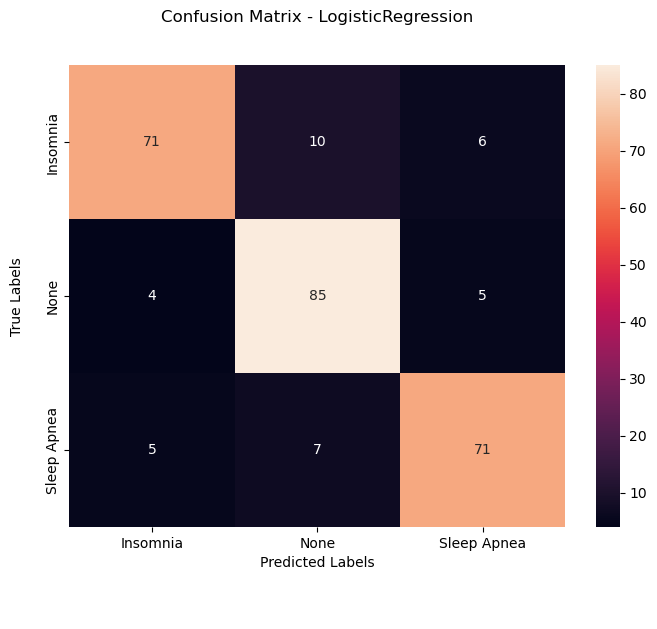

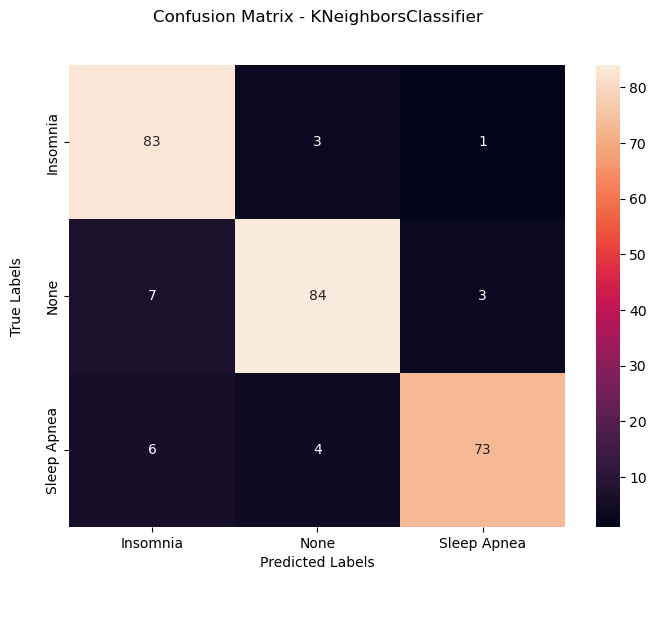

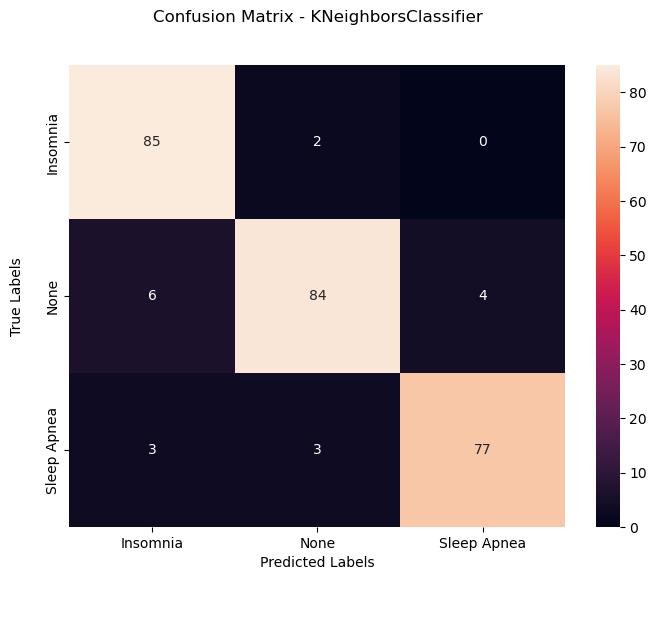

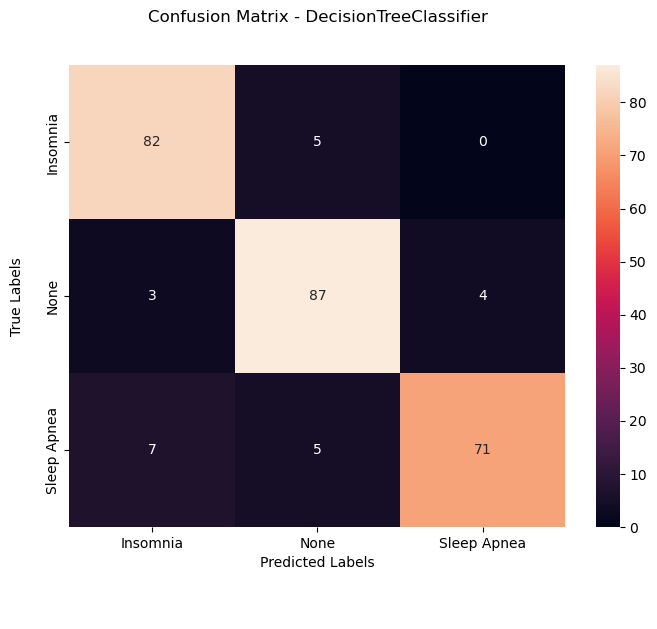

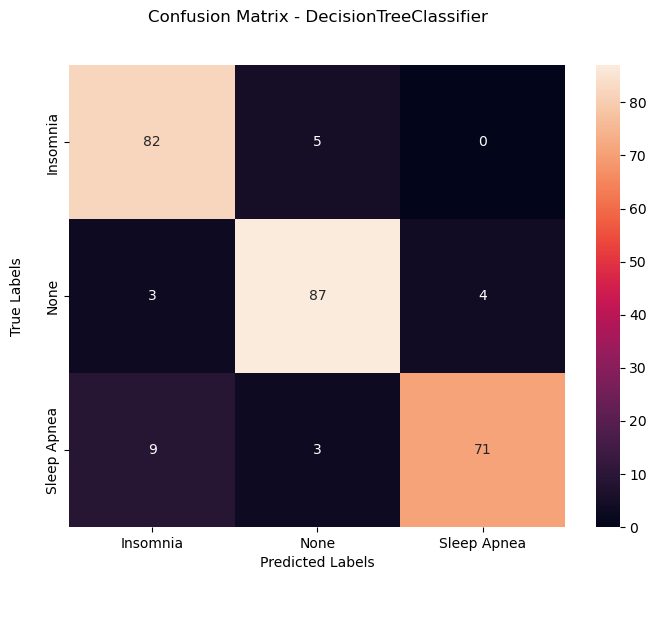

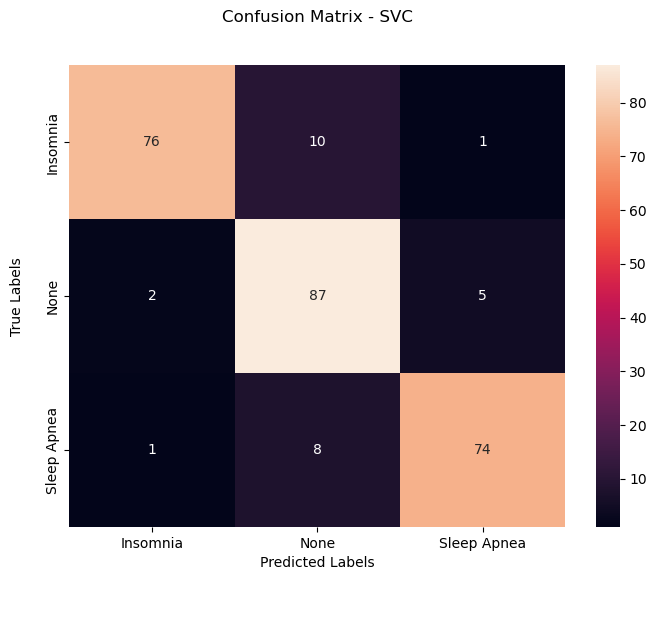

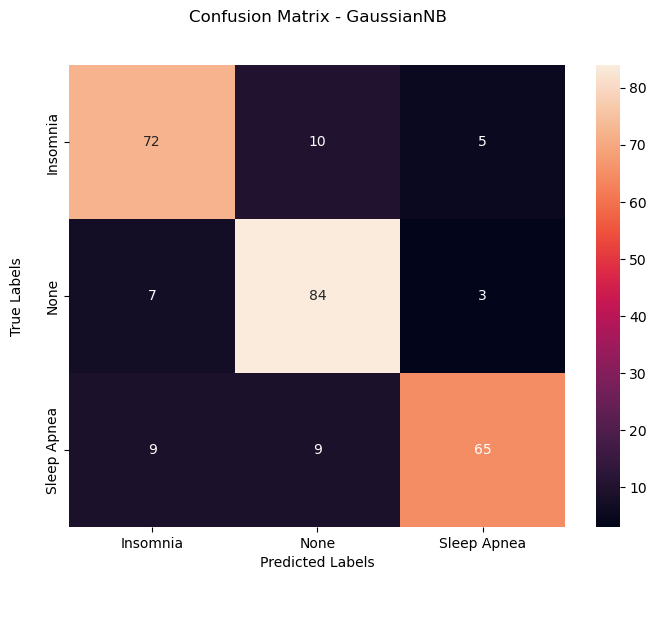

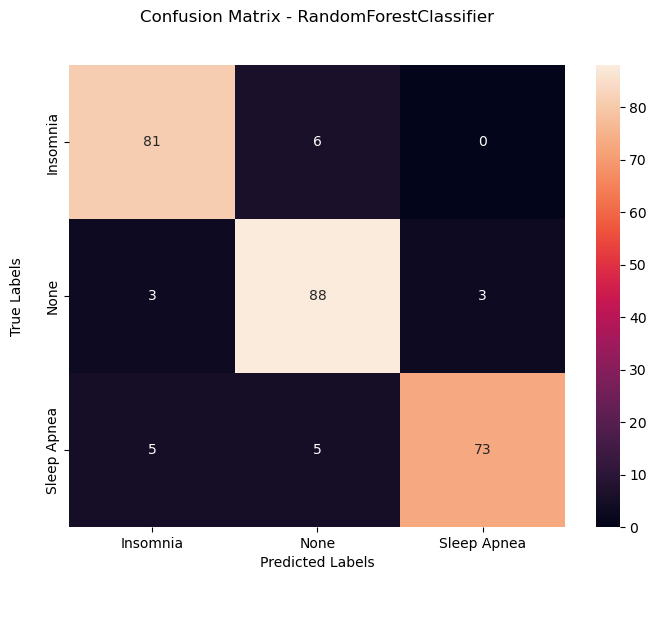

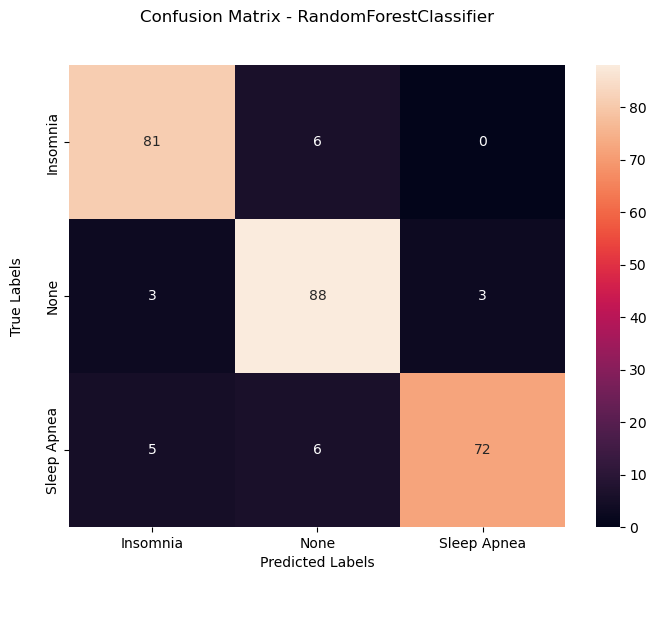

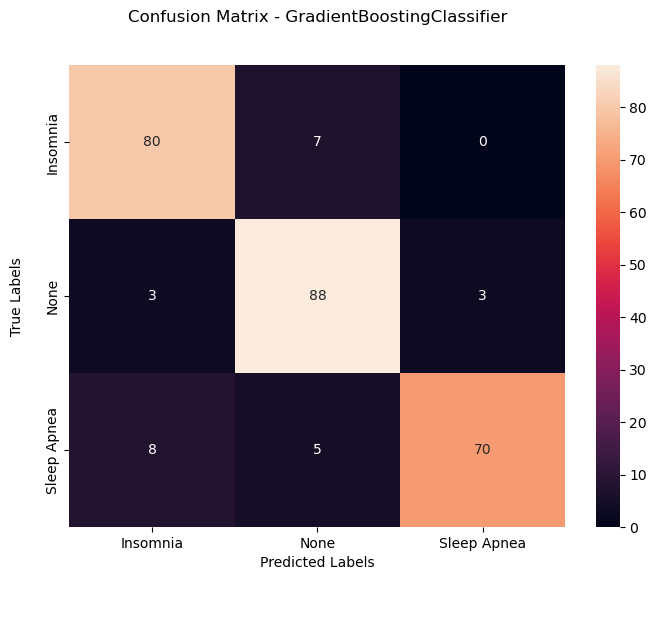

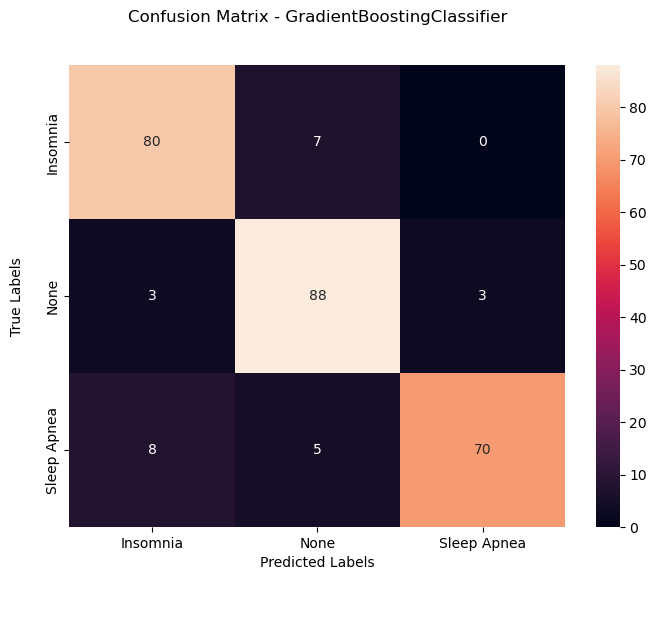

In [113]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classes = ['Insomnia', 'None', 'Sleep Apnea']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix - {type(model).__name__}\n\n")
    plt.xlabel("Predicted Labels\n\n\n")
    plt.ylabel("True Labels\n")
    plt.show()


for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test)

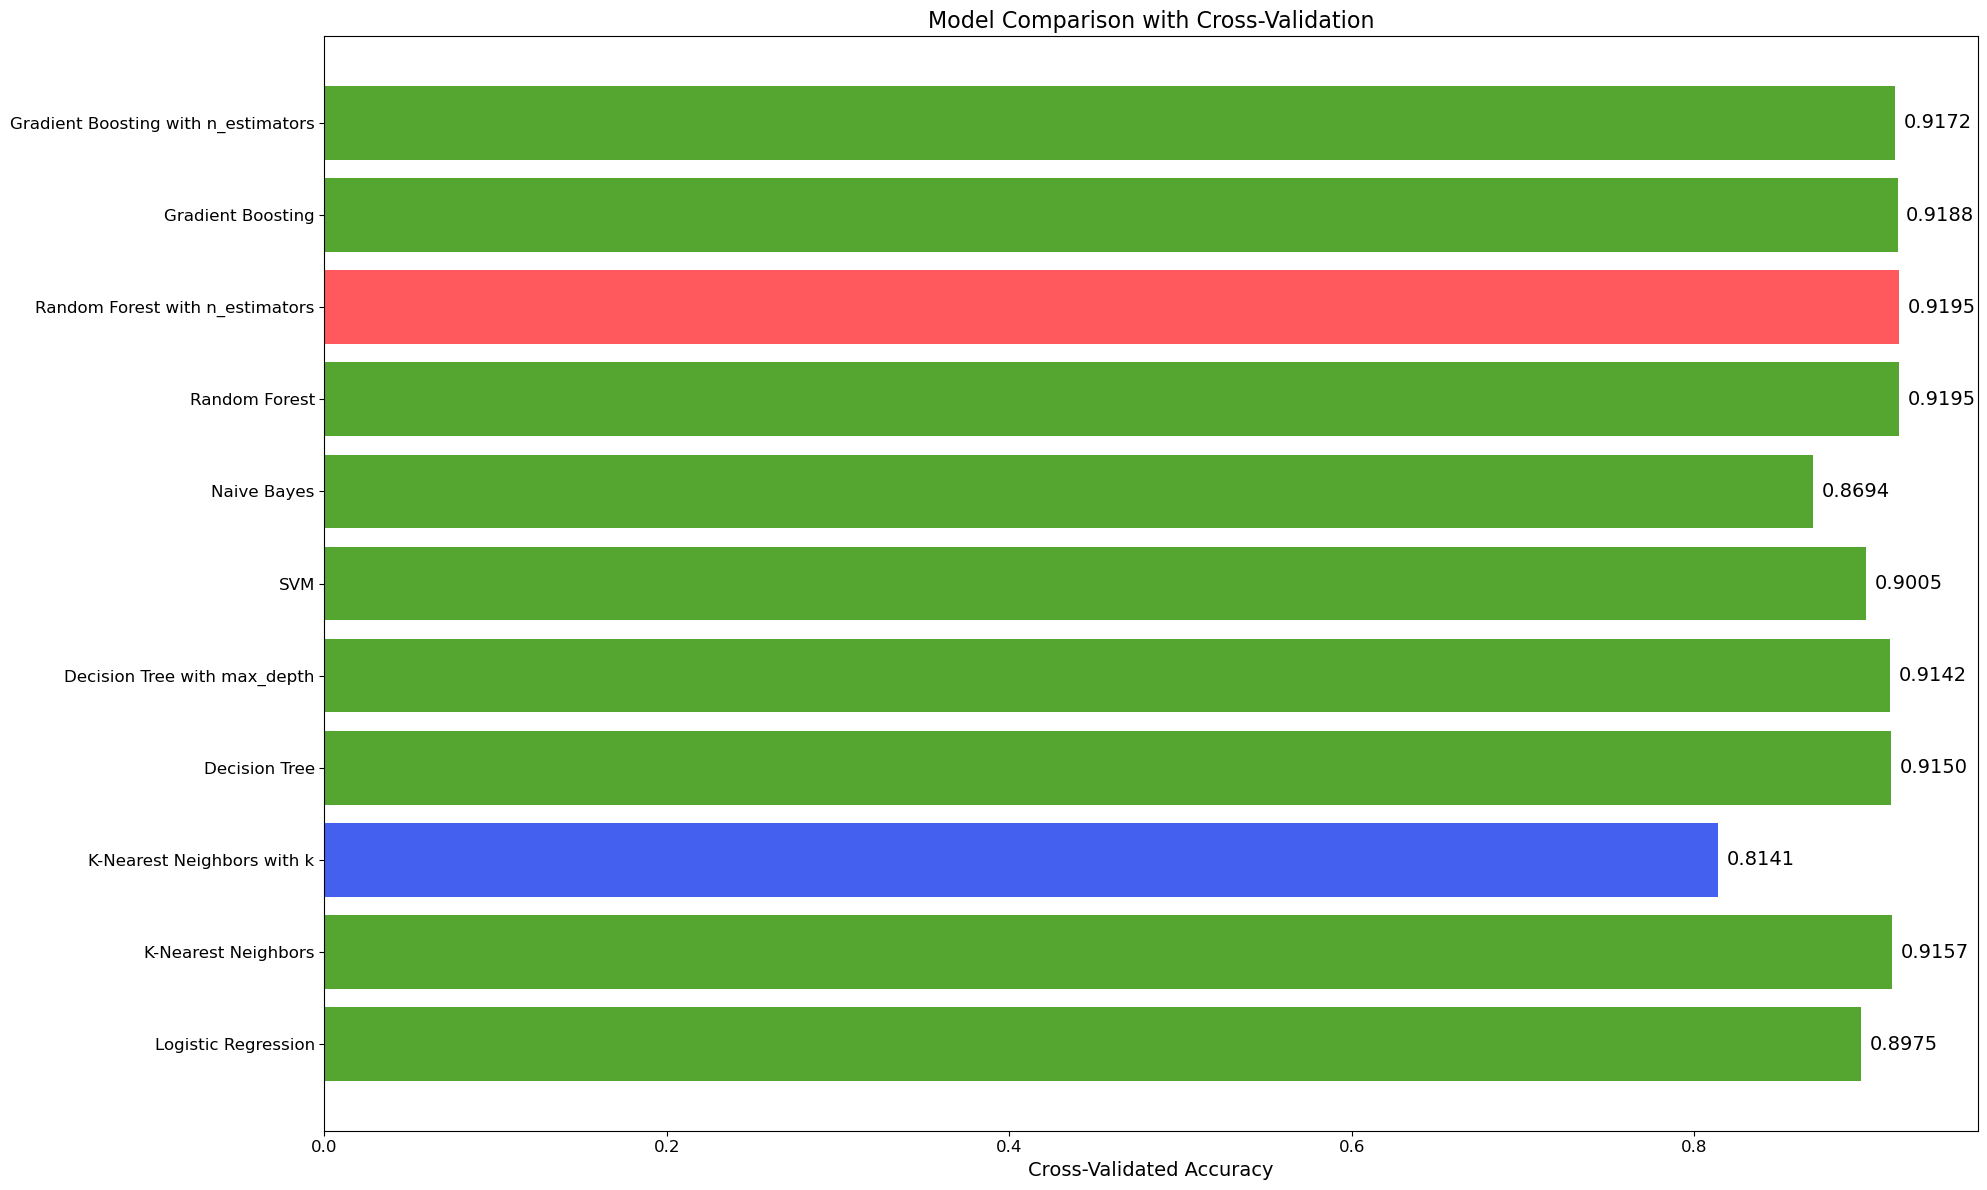

In [105]:
max_accuracy = results_df["CV Mean Accuracy"].max()
min_accuracy = results_df["CV Mean Accuracy"].min()

plt.figure(figsize=(20, 12))

colors = ['#ff595e' if accuracy == max_accuracy else ('#4361ee' if accuracy == min_accuracy else '#55a630')
          for accuracy in results_df["CV Mean Accuracy"]]

bars = plt.barh(results_df["Model"], results_df["CV Mean Accuracy"], color=colors)
plt.xlabel("Cross-Validated Accuracy", fontsize=14)
plt.title("Model Comparison with Cross-Validation", fontsize=16)

for bar, accuracy in zip(bars, results_df["CV Mean Accuracy"]):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f"{accuracy:.4f}",
             va='center', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

In [106]:
optimum_model = results_df.loc[results_df['CV Mean Accuracy'].idxmax(), 'Model']

In [107]:
optimum_model

'Random Forest with n_estimators'

In [108]:
from joblib import dump

In [109]:
dump(models[optimum_model],'./../savedModels/sleep_disorder_model.joblib')

['./../savedModels/sleep_disorder_model.joblib']